# Smart Home Energy Management

# Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

# 1)Problem Statement :
Develop a predictive model to forecast smart home energy consumption and provide actionable insights for reducing peak demand, improving efficiency, and promoting sustainable energy usage.

# 2) Data Collection
-Dataset Source
-The data consists of 12 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [122]:
# 1) Load & peek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [233]:
# Load CSV
df = pd.read_csv(r"C:\Users\kalur\OneDrive\Documents\Desktop\SmartHomeEnergyManagement\Rawdata\smart_home_energy_v3.csv", parse_dates=["Timestamp"])

# Shape and Info

In [236]:
print("Shape:", df.shape)
display(df.head())
display(df.tail())
print("\nDtypes:\n", df.dtypes)
print("\nInfo:\n")
df.info()

Shape: (1000, 13)


,Timestamp,Temperature(°C),Weather,Occupancy,Appliance_Usage(kWh),Smart_Lighting(kWh),Thermostat_Setting(°C),Energy_Consumption(kWh),Peak_Hours,Alert,Hour,DayOfWeek,IsWeekend
0,2024-01-01 00:00:00,20.04,Cloudy,0.0,1.13,0.66,20.0,4.00,0.0,Normal,0,0,0
1,2024-01-01 01:00:00,22.40,Sunny,0.0,1.98,0.52,21.0,5.44,0.0,NaN,1,0,0
2,2024-01-01 02:00:00,22.00,NaN,0.0,2.13,0.50,22.0,5.45,0.0,NaN,2,0,0
3,2024-01-01 03:00:00,21.63,Cloudy,1.0,1.64,NaN,22.0,4.80,0.0,Normal,3,0,0
4,2024-01-01 04:00:00,21.24,Cloudy,0.0,2.08,0.47,21.0,4.02,0.0,Normal,4,0,0


,Timestamp,Temperature(°C),Weather,Occupancy,Appliance_Usage(kWh),Smart_Lighting(kWh),Thermostat_Setting(°C),Energy_Consumption(kWh),Peak_Hours,Alert,Hour,DayOfWeek,IsWeekend
995,2024-02-11 11:00:00,24.89,Sunny,2.0,1.53,0.14,22.0,4.97,0.0,High Usage,11,6,1
996,2024-02-11 12:00:00,22.36,Cloudy,0.0,1.80,0.27,23.0,3.40,0.0,NaN,12,6,1
997,2024-02-11 13:00:00,23.02,Sunny,0.0,1.23,0.26,23.0,4.41,0.0,Normal,13,6,1
998,2024-02-11 14:00:00,22.68,Sunny,2.0,1.30,0.16,22.0,5.19,0.0,Normal,14,6,1
999,2024-02-11 15:00:00,25.52,Sunny,0.0,2.31,0.10,23.0,4.97,0.0,Normal,15,6,1



Dtypes:
 Timestamp                  datetime64[ns]
Temperature(°C)                   float64
Weather                            object
Occupancy                         float64
Appliance_Usage(kWh)              float64
Smart_Lighting(kWh)               float64
Thermostat_Setting(°C)            float64
Energy_Consumption(kWh)           float64
Peak_Hours                        float64
Alert                              object
Hour                                int64
DayOfWeek                           int64
IsWeekend                           int64
dtype: object

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                1000 non-null   datetime64[ns]
 1   Temperature(°C)          961 non-null    float64       
 2   Weather                  958 non-null    object        
 3   Occupa

# 2.2 Data information – Smart Home Energy Dataset

Timestamp : Date and time when the energy consumption was recorded. → (Datetime: e.g., 2025-08-23 14:30:00)

EnergyConsumption : Amount of electricity consumed by the household during the recorded time interval. → (Numeric: kWh)

Temperature : Outside temperature at the time of measurement. → (Numeric: °C)

Humidity : Humidity percentage at the time of measurement. → (Numeric: %)

ApplianceUsage : Total energy consumed by household appliances. → (Numeric: kWh)

Occupancy : Number of people present in the house at that time. → (Numeric: count of occupants)

Hour : Extracted from Timestamp, representing the hour of the day (0–23). → (Numeric)

DayOfWeek : Extracted from Timestamp, representing day of week (0=Monday, 6=Sunday). → (Numeric)

IsWeekend : Whether the day is weekend or not. → (Binary: 0 = Weekday, 1 = Weekend)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

# 3.1 Check Missing values

In [253]:
df.isna().sum()

Timestamp                  0
Temperature(°C)            0
Weather                    0
Occupancy                  0
Appliance_Usage(kWh)       0
Smart_Lighting(kWh)        0
Thermostat_Setting(°C)     0
Energy_Consumption(kWh)    0
Peak_Hours                 0
Alert                      0
Hour                       0
DayOfWeek                  0
IsWeekend                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [257]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [261]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                1000 non-null   datetime64[ns]
 1   Temperature(°C)          1000 non-null   float64       
 2   Weather                  1000 non-null   object        
 3   Occupancy                1000 non-null   float64       
 4   Appliance_Usage(kWh)     1000 non-null   float64       
 5   Smart_Lighting(kWh)      1000 non-null   float64       
 6   Thermostat_Setting(°C)   1000 non-null   float64       
 7   Energy_Consumption(kWh)  1000 non-null   float64       
 8   Peak_Hours               1000 non-null   float64       
 9   Alert                    1000 non-null   object        
 10  Hour                     1000 non-null   int64         
 11  DayOfWeek                1000 non-null   int64         
 12  IsWeekend                1000 non-n

### 3.4 Checking the number of unique values of each column

In [264]:
df.nunique()

Timestamp                  1000
Temperature(°C)             514
Weather                       4
Occupancy                     5
Appliance_Usage(kWh)        185
Smart_Lighting(kWh)          86
Thermostat_Setting(°C)        8
Energy_Consumption(kWh)     406
Peak_Hours                    2
Alert                         2
Hour                         24
DayOfWeek                     7
IsWeekend                     2
dtype: int64

### 3.5 Check statistics of data set

In [269]:
df.describe()

,Timestamp,Temperature(°C),Occupancy,Appliance_Usage(kWh),Smart_Lighting(kWh),Thermostat_Setting(°C),Energy_Consumption(kWh),Peak_Hours,Hour,DayOfWeek,IsWeekend
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-01-21 19:29:59.999999744,23.489500,1.353000,1.916140,0.350490,23.180000,5.061020,0.345000,11.436000,2.976000,0.280000
min,2024-01-01 00:00:00,18.420000,0.000000,0.650000,0.050000,20.000000,2.340000,0.000000,0.000000,0.000000,0.000000
25%,2024-01-11 09:45:00,22.335000,0.000000,1.640000,0.180000,22.000000,4.267500,0.000000,5.000000,1.000000,0.000000
50%,2024-01-21 19:30:00,23.550000,1.000000,1.910000,0.290000,23.000000,4.945000,0.000000,11.000000,3.000000,0.000000
75%,2024-02-01 05:15:00,24.670000,2.000000,2.180000,0.492500,24.000000,5.832500,1.000000,17.000000,5.000000,1.000000
max,2024-02-11 15:00:00,28.750000,4.000000,3.090000,0.900000,27.000000,8.490000,1.000000,23.000000,6.000000,1.000000
std,NaN,1.704956,1.238517,0.398155,0.227529,1.190385,1.125693,0.475606,6.913009,1.990826,0.449224


# Insight

# 3.7 Exploring Data

In [273]:
df.head()

,Timestamp,Temperature(°C),Weather,Occupancy,Appliance_Usage(kWh),Smart_Lighting(kWh),Thermostat_Setting(°C),Energy_Consumption(kWh),Peak_Hours,Alert,Hour,DayOfWeek,IsWeekend
0,2024-01-01 00:00:00,20.04,Cloudy,0.0,1.13,0.66,20.0,4.00,0.0,Normal,0,0,0
1,2024-01-01 01:00:00,22.40,Sunny,0.0,1.98,0.52,21.0,5.44,0.0,Normal,1,0,0
2,2024-01-01 02:00:00,22.00,Sunny,0.0,2.13,0.50,22.0,5.45,0.0,Normal,2,0,0
3,2024-01-01 03:00:00,21.63,Cloudy,1.0,1.64,0.29,22.0,4.80,0.0,Normal,3,0,0
4,2024-01-01 04:00:00,21.24,Cloudy,0.0,2.08,0.47,21.0,4.02,0.0,Normal,4,0,0


In [275]:
import pandas as pd
# Loop through each column and print unique categories
for col in df.columns:
    print(f"Categories in '{col}' variable: ", end=" ")
    print(df[col].unique())
    print("-" * 80)

Categories in 'Timestamp' variable:  <DatetimeArray>
['2024-01-01 00:00:00', '2024-01-01 01:00:00', '2024-01-01 02:00:00',
 '2024-01-01 03:00:00', '2024-01-01 04:00:00', '2024-01-01 05:00:00',
 '2024-01-01 06:00:00', '2024-01-01 07:00:00', '2024-01-01 08:00:00',
 '2024-01-01 09:00:00',
 ...
 '2024-02-11 06:00:00', '2024-02-11 07:00:00', '2024-02-11 08:00:00',
 '2024-02-11 09:00:00', '2024-02-11 10:00:00', '2024-02-11 11:00:00',
 '2024-02-11 12:00:00', '2024-02-11 13:00:00', '2024-02-11 14:00:00',
 '2024-02-11 15:00:00']
Length: 1000, dtype: datetime64[ns]
--------------------------------------------------------------------------------
Categories in 'Temperature(°C)' variable:  [20.04 22.4  22.   21.63 21.24 23.92 22.23 22.85 26.89 24.44 22.2  24.75
 22.74 25.84 25.27 25.99 25.24 24.16 25.74 24.66 23.53 23.86 19.87 23.12
 23.98 23.56 22.34 22.89 20.33 21.95 23.28 24.48 23.59 24.95 25.22 22.32
 25.49 22.66 23.78 26.05 25.91 21.9  24.53 24.41 23.23 23.69 20.73 23.55
 21.92 19.53 21.61 21.

In [277]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Timestamp', 'Temperature(°C)', 'Occupancy', 'Appliance_Usage(kWh)', 'Smart_Lighting(kWh)', 'Thermostat_Setting(°C)', 'Energy_Consumption(kWh)', 'Peak_Hours', 'Hour', 'DayOfWeek', 'IsWeekend']

We have 2 categorical features : ['Weather', 'Alert']


In [279]:
df.head(5)

,Timestamp,Temperature(°C),Weather,Occupancy,Appliance_Usage(kWh),Smart_Lighting(kWh),Thermostat_Setting(°C),Energy_Consumption(kWh),Peak_Hours,Alert,Hour,DayOfWeek,IsWeekend
0,2024-01-01 00:00:00,20.04,Cloudy,0.0,1.13,0.66,20.0,4.00,0.0,Normal,0,0,0
1,2024-01-01 01:00:00,22.40,Sunny,0.0,1.98,0.52,21.0,5.44,0.0,Normal,1,0,0
2,2024-01-01 02:00:00,22.00,Sunny,0.0,2.13,0.50,22.0,5.45,0.0,Normal,2,0,0
3,2024-01-01 03:00:00,21.63,Cloudy,1.0,1.64,0.29,22.0,4.80,0.0,Normal,3,0,0
4,2024-01-01 04:00:00,21.24,Cloudy,0.0,2.08,0.47,21.0,4.02,0.0,Normal,4,0,0


### 4. Exploring Data ( Visualization )

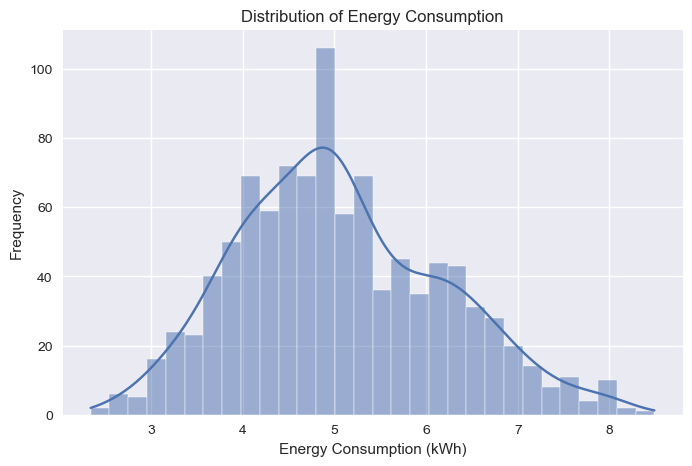

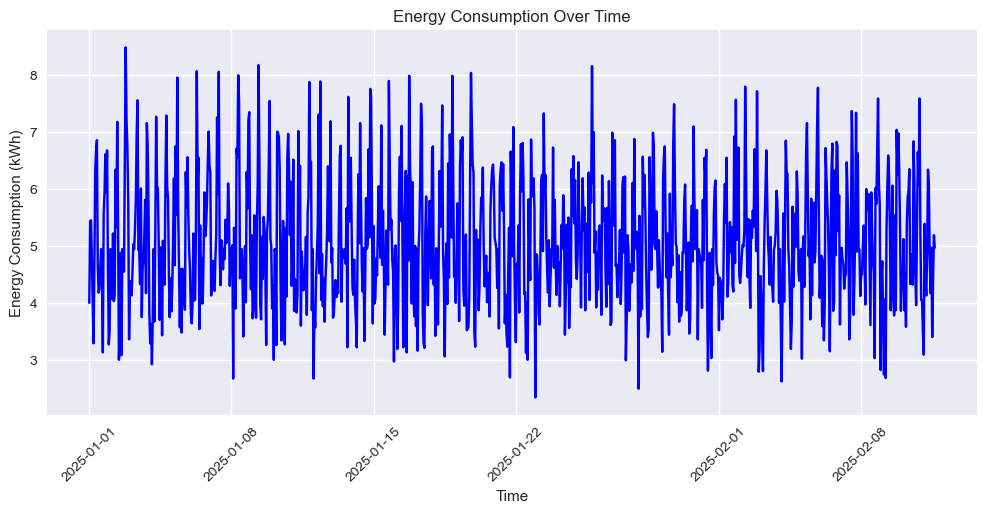

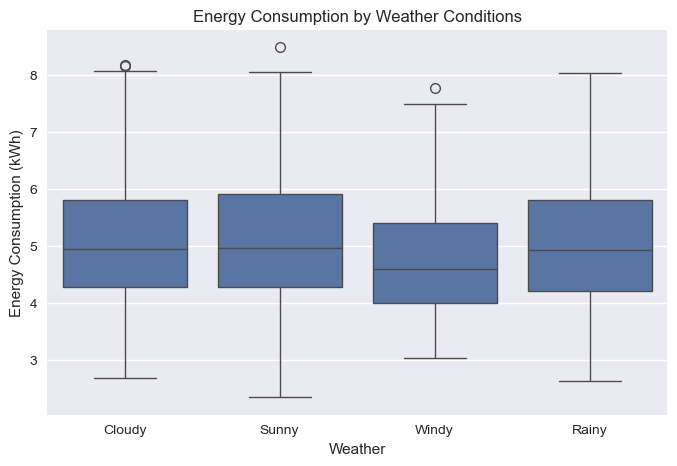

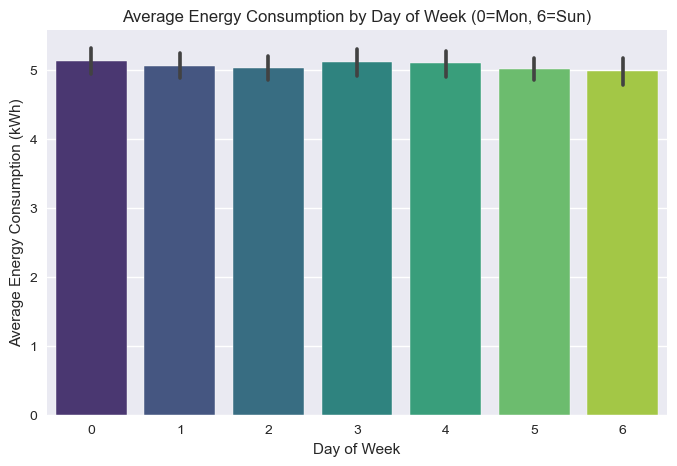

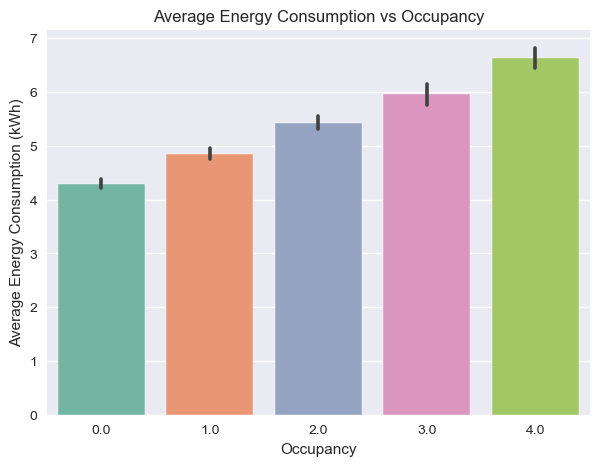

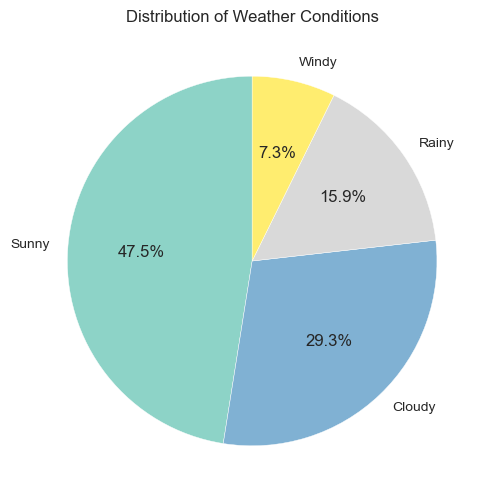

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use("seaborn-v0_8")

# ===============================
# 1. Histogram (Univariate) - Energy Consumption
# ===============================
plt.figure(figsize=(8,5))
sns.histplot(df["Energy_Consumption(kWh)"], bins=30, kde=True)
plt.title("Distribution of Energy Consumption")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.show()

# ===============================
# 2. Line Plot - Energy Consumption Over Time
# ===============================
plt.figure(figsize=(12,5))
plt.plot(df["Timestamp"], df["Energy_Consumption(kWh)"], color="blue")
plt.title("Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.xticks(rotation=45)
plt.show()

# ===============================
# 3. Boxplot - Energy Consumption by Weather
# ===============================
plt.figure(figsize=(8,5))
sns.boxplot(x="Weather", y="Energy_Consumption(kWh)", data=df)
plt.title("Energy Consumption by Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Energy Consumption (kWh)")
plt.show()

# ===============================
# 4. Average Energy Consumption by Day of Week
# ===============================
plt.figure(figsize=(8,5))
sns.barplot(x="DayOfWeek", y="Energy_Consumption(kWh)", data=df, estimator="mean", palette="viridis")
plt.title("Average Energy Consumption by Day of Week (0=Mon, 6=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Average Energy Consumption (kWh)")
plt.show()

# ===============================
# 5. Energy Consumption vs Occupancy
# ===============================
plt.figure(figsize=(7,5))
sns.barplot(x="Occupancy", y="Energy_Consumption(kWh)", data=df, estimator="mean", palette="Set2")
plt.title("Average Energy Consumption vs Occupancy")
plt.xlabel("Occupancy")
plt.ylabel("Average Energy Consumption (kWh)")
plt.show()


# ===============================
# 6. Pie Chart - Distribution of Weather Conditions
# ===============================
plt.figure(figsize=(6,6))
df["Weather"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set3")
plt.title("Distribution of Weather Conditions")
plt.ylabel("")
plt.show()


#### 4. Multivariate analysis using pieplot

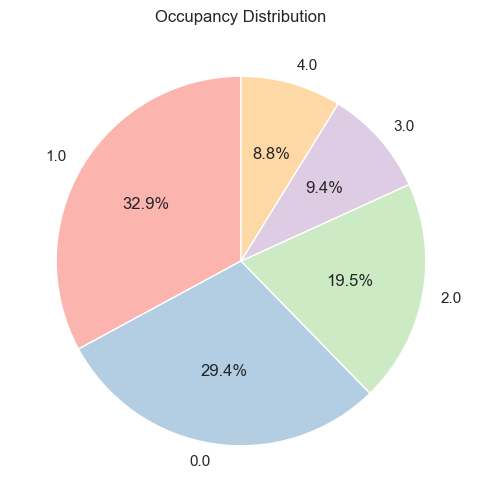

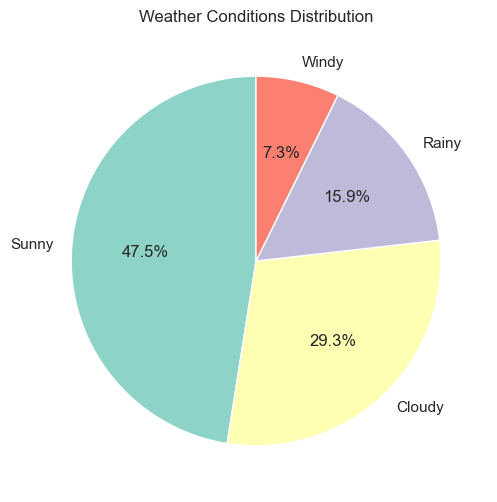

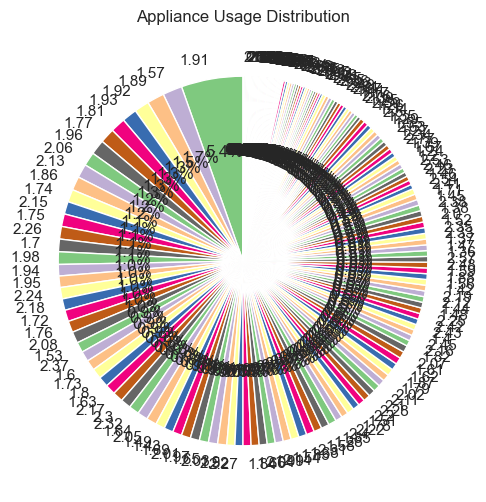

In [303]:
# 1. Pie chart for Occupancy distribution
plt.figure(figsize=(6,6))
df['Occupancy'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Occupancy Distribution")
plt.ylabel("")
plt.show()

# 2. Pie chart for Weather distribution
plt.figure(figsize=(6,6))
df['Weather'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Weather Conditions Distribution")
plt.ylabel("")
plt.show()

# 3. Pie chart for Appliance usage distribution
plt.figure(figsize=(6,6))
df['Appliance_Usage(kWh)'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Accent.colors)
plt.title("Appliance Usage Distribution")
plt.ylabel("")
plt.show()


#### BIVARIATE ANALYSIS

# Checking Outliers

In [312]:
# 7) Outliers (IQR method)
outlier_counts = {}
for c in num_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = (~df[c].between(lower, upper)).sum()
    outlier_counts[c] = outliers

print("Potential outliers per numeric column:")
print(outlier_counts)

Potential outliers per numeric column:
{'Temperature(°C)': 8, 'Occupancy': 0, 'Appliance_Usage(kWh)': 5, 'Smart_Lighting(kWh)': 0, 'Thermostat_Setting(°C)': 0, 'Energy_Consumption(kWh)': 1, 'Peak_Hours': 0, 'Hour': 0, 'DayOfWeek': 0, 'IsWeekend': 0}


#  Correlation & relationships

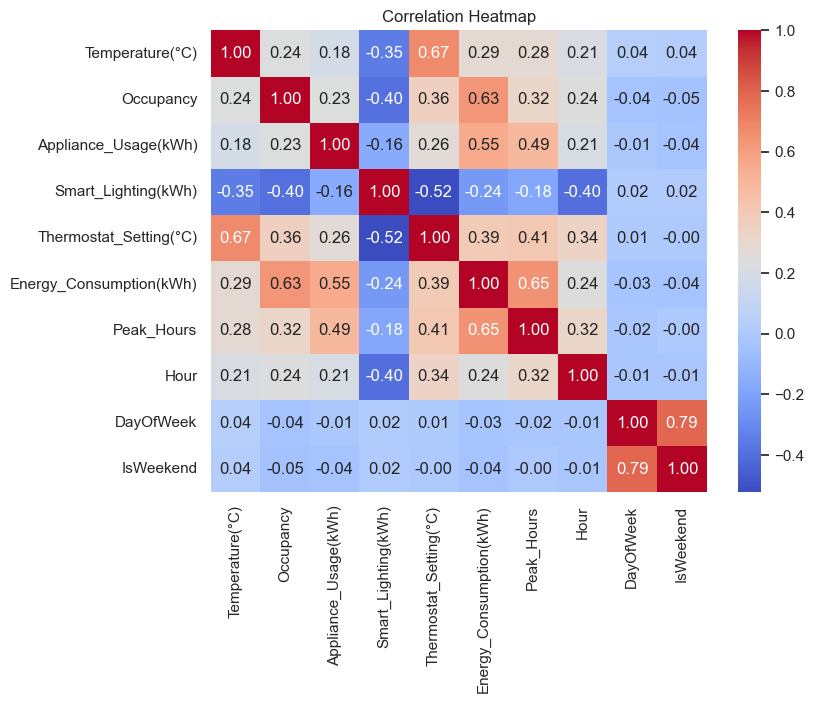

In [299]:
#  Correlation & relationships
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Example target vs feature (scatter/line/groupby)
target = "energy_consumption_kwh"  # <-- change if needed
if target in df.columns:
    for c in num_cols:
        if c != target:
            df.plot(kind="scatter", x=c, y=target, alpha=0.5, title=f"{c} vs {target}")
            plt.show()

In [345]:
# Save changes 
df.to_csv(r"C:\Users\kalur\OneDrive\Documents\Desktop\SmartHomeEnergyManagement\Rawdata\smart_home_energy_v3.csv", index=False)
print("Cleaned data saved -> smart_home_energy_clean.csv")

Cleaned data saved -> smart_home_energy_clean.csv


# Conclusion

Energy consumption is strongly influenced by temperature and weather conditions, with extreme climates leading to higher usage.

Occupancy status plays a vital role, as homes consume significantly more energy when occupied.

Certain appliances contribute disproportionately to total energy use, making them prime targets for optimization.

Monitoring and forecasting energy usage is essential for reducing costs and improving efficiency.

Smart home integration and predictive models can optimize consumption, helping homeowners achieve financial savings and sustainability goals.